# Bivariate-Analysis
Showing different methods of analysing the statistical and graphical significant difference between two variables.

    Part 4: Normality test
    Part 5: T-Test for two groups
    Part 6: Confidence intervals for two groups with unknown variance
    Part 7: U-Test for two groups
    Part 8: Chi-square-Test for two categorical variables
    Part 9: Chi-square-Test for each outcome of a categorical variable

# Imports & Read data

In [1]:
import sys
sys.path.insert(0, 'lib\\')
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats
import Analyser

## Read data

In [3]:
df = pd.read_csv('data\\Facebook_Ads.csv', encoding='ISO-8859-1')

# Create Analyser object

In [4]:
myAnalyser = Analyser.Analyser()

# Test of Normality
    H0: Sample comes from a normal-distributed population        H1: Sample comes NOT from a normal-distributed population     

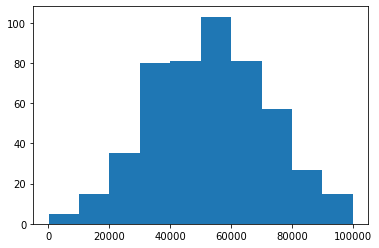

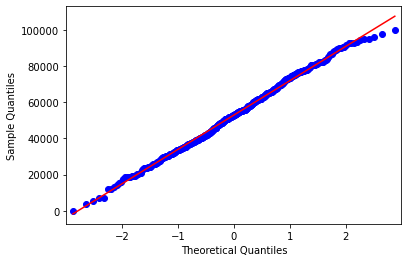

Alpha      = 0.05
p          = 0.0678809
Statistik  = 5.379999887156919
Sample looks Gaussian (fail to reject H0)


In [5]:
myAnalyser.normality_test(df['Salary'])

Further links:

 - https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
 - https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f

# T-Test for two groups
Test of equality of two independent expected values with unknown, but equal variance.
The T-Test (parametric-test) is applied, if the assumption that the data comes from a normal-distribution can be hold up.

    H0: Expected values are equal           H1: Expected values are not equal           

In [6]:
group1 = df[df['Clicked'] == 0]['Salary']
group2 = df[df['Clicked'] == 1]['Salary']
group1.name = 'Clicked_No'
group2.name = 'Clicked_Ye
s'

myAnalyser.t_test_for_two_EX_with_unknown_but_equal_variance(group1, group2)

(      Variable      N          Mean            SD          SE     95% Conf.  \
 0   Clicked_No  249.0  40453.190331  14250.011901  903.057811  38674.549652   
 1  Clicked_Yes  250.0  65291.019398  14486.331391  916.196043  63486.537514   
 2     combined  499.0  52896.992469  18989.183150  850.072585  51226.821722   
 
        Interval  
 0  42231.831010  
 1  67095.501282  
 2  54567.163215  ,
                          Independent t-test     results
 0  Difference (Clicked_No - Clicked_Yes) =  -24837.8291
 1                     Degrees of freedom =     497.0000
 2                                      t =     -19.3068
 3                  Two side test p value =       0.0000
 4                 Difference < 0 p value =       0.0000
 5                 Difference > 0 p value =       1.0000
 6                              Cohen's d =      -1.7286
 7                              Hedge's g =      -1.7260
 8                          Glass's delta =      -1.7430
 9                             

Further links:
 - https://www.pythonfordatascience.org/independent-samples-t-test-python/
 - https://towardsdatascience.com/a-complete-guide-to-confidence-interval-and-examples-in-python-ff417c5cb593
 - https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

# Confidence intervals for two groups with unknown variance

Confidence Interval:   99.0 %
Group1 ( Clicked_No ): CI = [ 38674.55 ; 42231.83 ]
Group2 ( Clicked_Yes ): CI = [ 63486.54 ; 67095.5 ]


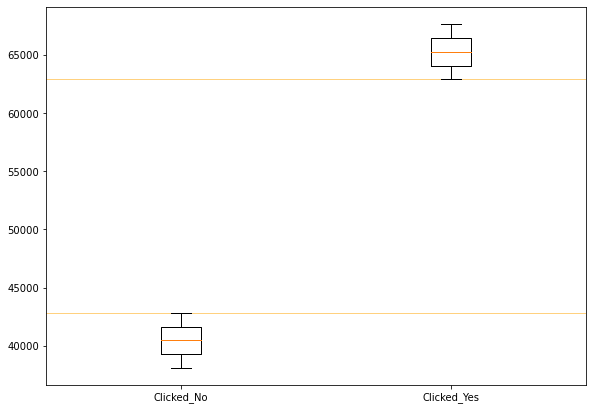

In [12]:
group1 = df[df['Clicked'] == 0]['Salary']
group2 = df[df['Clicked'] == 1]['Salary']
group1.name = 'Clicked_No'
group2.name = 'Clicked_Yes'

myAnalyser.confidence_interval_with_unknown_variance(group1,group2, 0.01)

# U-Test for two groups
The U-Test (non-parametric-test) is an alternative to the t-test, if the assumption that the data comes from a normal-distribution can't be hold up. 

['--------------------------------------------------------------------------------------',
 '----------------------------------------------------------------- OBSERVED FREQUENCIES',
    Clicked  Total
 0        0    249
 1        1    250,
 '-------------------------------------------------------------------- AVERGAE RANKSUMS',
 'Clicked = 0    E(sum(rank)) = 152.23',
 'Clicked = 1    E(sum(rank)) = 347.38',
 '                     E(sum(rank)) = 250.0',
 '------------------------------------------------------------------------- TEST RESULTS',
 'U-Statistik:     6781.0',
 'p-Value:         0.0 %',
 '-------------------------------------------------------------------------------- PLOT',
 <AxesSubplot:xlabel='Clicked', ylabel='Salary'>]

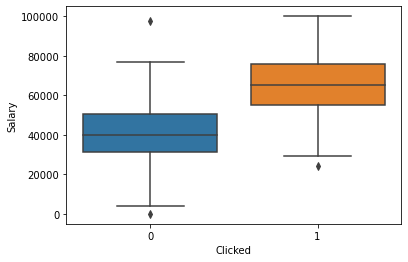

In [13]:
myAnalyser.mann_whitney_U_test(df['Clicked'], df['Salary'])

Salary has a significant impact wheather a user click an add or not (p_value of 0%), 
in general people with a higher salary  do click on the add  

# Chi-Square-Test for two categorical variables
Non-parametric-test for two categorical variables.

['3 attributes',
 '--------------------------------------------------------------------------------------',
 '----------------------------------------------------------------- OBSERVED FREQUENCIES',
 '--------------------------------------------------------------------------------------',
            Salary_cat                 
 Salary_cat       high  low middle  All
 Clicked                               
 0                  11  194     44  249
 1                 141   34     75  250
 All               152  228    119  499,
 '--------------------------------------------------------------------------------------',
 '------------------------------------------------------ OBSERVED FREQUENCIES (relative)',
 '--------------------------------------------------------------------------------------',
            Salary_cat                       
 Salary_cat       high     low  middle    All
 Clicked                                     
 0                7.24   85.09   36.97   49.9
 1          

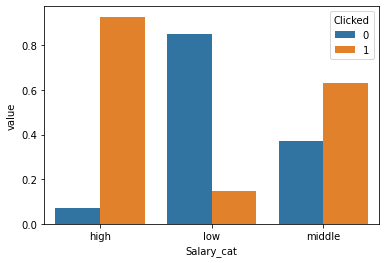

In [14]:
# apply Chi_Squared-Test 
df['Salary_cat'] = np.where(df['Salary'] < 51000, 'low',np.where(df['Salary'] < 63000, 'middle','high'))
myAnalyser.chi_squared_test(df['Clicked'], df['Salary_cat'])

Observed and expected figures differ significantly (p_value=0%). The two split values for binning the Salary-variable into three bins with 51K and 63K are the optimal values such that CramerV its maximum (see 
"Categorising-under-maximising-CramerV-using-HyperOpt.ipynb"). The high salary-category is extremely unbalanced with favouring "Clicked" whereas the low salary-category shows the exact counterpart.

# Chi-Square-Test for each outcome of a categorical variable
Applying for each outcome of a categorical variable the Chi-square-test via outcome and the indicator-function.

In [15]:
myAnalyser.chi_square_test_for_each_category_level(df['Clicked'], df['Salary_cat'])

,AttrCharacteristic,AttrCharacteristicRenamed,ChiSq,p_value,CramerV
1,low,low,207.9290,0.0000,0.6455
0,high,high,159.1396,0.0000,0.5647
2,middle,middle,10.4421,0.0012,0.1447


The correlation measure CramerV verifies that the 'low and high salary' outcome has the most significant result with clicked.